In [117]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("FixedStrides")
from main import *
# results_au = pd.read_csv('ipResults_home_gtx980_australia.csv', sep=';')
results_au_32bit = pd.read_csv('ip_32bit_au.csv', sep=';')
results_tokyo = pd.read_csv('ip_32bit_tokyo.csv', sep=';')
results_au_32bit.drop(results_au_32bit.columns[len(results_au_32bit.columns)-1], axis=1, inplace=True)  # delete NaN column
results_tokyo.drop(results_tokyo.columns[len(results_tokyo.columns)-1], axis=1, inplace=True)  # delete NaN column

In [118]:
def plot_prefix_distribution(prefixes):
    lengths = []
    for p in prefixes:
        len_p = len(p)
        if len_p > len(lengths):
            lengths.extend([0] * (len_p - len(lengths)))
        lengths[len_p - 1] += 1
    plt.bar(range(1, len(lengths) + 1), lengths, align='center')
    plt.xlabel('Prefix length in bits')
    plt.ylabel('Num occurrences')
    plt.title('Prefix length distribution')
    plt.show()

In [119]:
prefixes_tokyo = utils.get_prefixes_from_file(file_name='FixedStrides/data/data-raw-table_tokyo_012016.txt')
prefixes_au = utils.get_prefixes_from_file(file_name='FixedStrides/data/data-raw-table_australia_012016.txt')

Read 576846 prefixes from file in 8.813172578811646 seconds
Read 565949 prefixes from file in 8.641227722167969 seconds


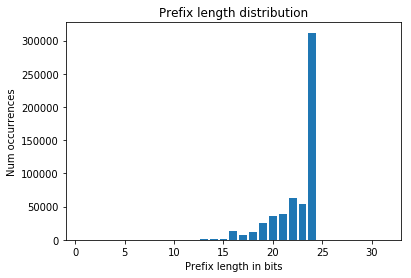

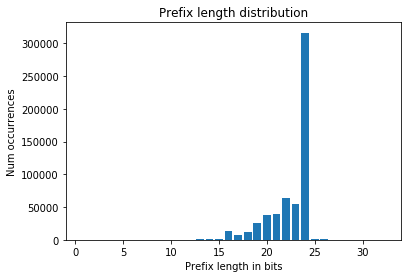

In [120]:
plot_prefix_distribution(prefixes_au)
plot_prefix_distribution(prefixes_tokyo)

In [121]:
strides_tokyo, nodes_tokyo = algos.fixed_strides_2(prefixes_tokyo)

In [122]:
strides_au, nodes_au = algos.fixed_strides_2(prefixes_au)

In [123]:
def append_stats(row: pd.Series, nodes: list):
    strides = row['Config'].replace('{', ' ').replace('}',' ').replace(',',' ').split()
    strides = [int(x) for x in strides]
    tmp, strides_nodes, cost, percent = get_stats(nodes, strides, ignore_last_level=True)
    build_and_find = float(row['Build']) + float(row['Find'])
    build_and_match = float(row['Build']) + float(row['Match'])
    match_and_find = float(row['Match']) + float(row['Find'])
    return pd.Series([cost, percent, build_and_find, build_and_match, match_and_find])
    

In [124]:
newcol_names = ['Cost', 'Percent', 'BuildAndFind', 'BuildAndMatch', 'MatchAndFind']
newcols_au = results_au_32bit.apply(lambda row: append_stats(row, nodes_au), axis=1)
newcols_tokyo = results_tokyo.apply(lambda row: append_stats(row, nodes_tokyo), axis=1)
newcols_au.columns = newcol_names
newcols_tokyo.columns = newcol_names
results_au_32bit = results_au_32bit.join(newcols_au)
results_tokyo = results_tokyo.join(newcols_tokyo)

In [125]:
results_au_32bit = results_au_32bit.sort_values('MatchAndFind')
results_au_32bit[['Config', 'Match', 'Find', 'MatchAndFind', 'Build', 'TreeMemoryUniqueOnly', 'Cost', 'RandomMatch', 'RandomSort', 'RandomSortedMatch']]

,Config,Match,Find,MatchAndFind,Build,TreeMemoryUniqueOnly,Cost,RandomMatch,RandomSort,RandomSortedMatch
22,"{1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1.530528,7.457376,8.987904,56.666782,3364564,1595754.0,1.332960,18.510496,0.772224
21,"{3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.851680,7.882976,9.734656,72.917122,3360524,1596820.0,0.718016,23.215040,0.495552
23,"{1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.031040,8.326432,10.357472,80.034492,3361708,1596924.0,0.814848,26.227137,0.537888
7,"{14, 2, 2, 2, 2, 2, 8}",1.236160,24.642015,25.878175,27.887424,2874868,1356220.0,4.647968,6.323392,4.506816
12,"{7, 7, 2, 2, 2, 2, 2, 8}",1.057824,24.821440,25.879264,26.784384,2830684,1354172.0,3.851424,6.644608,1.371392
18,"{8, 8, 2, 2, 2, 2, 8}",1.061728,25.556320,26.618048,26.247616,2846812,1356796.0,8.306464,5.986880,8.245344
6,"{16, 2, 2, 2, 2, 8}",0.939424,25.698561,26.637985,22.022144,3066612,1368572.0,32.039391,5.862944,31.631201
24,"{2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2}",1.521888,25.256128,26.778016,44.372192,2825220,1355912.0,0.567296,13.952352,0.466144
25,"{3, 5, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2}",1.319040,26.455456,27.774496,44.561855,2827500,1351068.0,0.793856,12.008640,0.601248
5,"{16, 2, 2, 4, 8}",1.564896,26.634016,28.198912,18.593184,2874092,1908448.0,31.772896,5.618880,31.429920


In [126]:
results_tokyo = results_tokyo.sort_values('MatchAndFind')
results_tokyo[['Config', 'Match', 'Find', 'MatchAndFind', 'Build', 'TreeMemoryUniqueOnly', 'Cost', 'RandomMatch', 'RandomSort', 'RandomSortedMatch']]

,Config,Match,Find,MatchAndFind,Build,TreeMemoryUniqueOnly,Cost,RandomMatch,RandomSort,RandomSortedMatch
22,"{1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1.483072,7.597632,9.080704,58.147041,3554832,1634482.0,1.256800,19.002304,0.741536
21,"{3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.831840,8.216736,10.048576,70.234978,3550600,1635544.0,0.734912,21.224735,0.503872
23,"{1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.078816,8.600736,10.679552,81.058144,3551560,1635648.0,0.789952,25.508415,0.547072
7,"{14, 2, 2, 2, 2, 2, 8}",1.052128,25.177759,26.229887,25.464128,3003792,1388436.0,4.708768,5.785728,4.440352
12,"{7, 7, 2, 2, 2, 2, 2, 8}",1.093504,25.379135,26.472639,28.066624,2958568,1386388.0,3.836256,6.436768,1.321248
24,"{2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2}",1.440224,26.232000,27.672224,49.454239,2983304,1392816.0,0.599200,12.933984,0.477920
18,"{8, 8, 2, 2, 2, 2, 8}",1.036512,26.658655,27.695167,27.547329,2971824,1388596.0,8.336768,5.844096,8.202976
6,"{16, 2, 2, 2, 2, 8}",0.989472,26.802977,27.792449,23.656576,3190592,1400628.0,32.380608,5.194400,31.554815
25,"{3, 5, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2}",1.368864,27.495424,28.864288,42.218143,2983040,1386842.0,0.772864,13.374688,0.613152
5,"{16, 2, 2, 4, 8}",1.609024,27.549536,29.158560,18.918049,3016840,1958408.0,32.135807,4.296544,31.721216


In [127]:
results_au_32bit = results_au_32bit.sort_values('TreeMemoryUniqueOnly')
results_au_32bit[['Config', 'TreeMemoryUniqueOnly', 'Cost', 'Percent', 'TreeLevels', 'ChildrenMemory', 'ChildrenCountsMemory', 'ScanMemory', 'PreScanMemory', 'PermuationMemory', 'LengthsMemory', 'MasksPartsMemory', 'ContainerSumMemory', 'ContainerItemsMemory', 'ContainerStartsMemory', 'ContainerLengthsMemory']]

,Config,TreeMemoryUniqueOnly,Cost,Percent,TreeLevels,ChildrenMemory,ChildrenCountsMemory,ScanMemory,PreScanMemory,PermuationMemory,LengthsMemory,MasksPartsMemory,ContainerSumMemory,ContainerItemsMemory,ContainerStartsMemory,ContainerLengthsMemory
14,"{8, 8, 16}",2309620,53760.0,3.366489,"{1,40,425,}",42000,12,12,12,2263796,2263796,2263796,2267584,2263796,1900,1888
0,"{16, 16}",2529420,65536.0,4.103910,"{1,425,}",262152,8,8,8,2263796,2263796,2263796,2267244,2263796,1728,1720
11,"{6, 6, 4, 4, 4, 8}",2623452,1934224.0,121.122464,"{1,40,124,425,4268,222,}",318824,24,24,24,2263796,2263796,2263796,2304556,2263796,20392,20368
10,"{12, 4, 4, 4, 8}",2628980,1934672.0,121.150518,"{1,124,425,4268,222,}",324704,20,20,20,2263796,2263796,2263796,2304216,2263796,20220,20200
20,"{4, 4, 4, 4, 4, 4, 4, 4}",2631476,1935744.0,121.217647,"{1,16,40,124,425,4268,222,57,}",326200,32,32,32,2263796,2263796,2263796,2305180,2263796,20708,20676
16,"{8, 8, 4, 4, 8}",2645972,1940720.0,121.529248,"{1,40,425,4268,222,}",342368,20,20,20,2263796,2263796,2263796,2303544,2263796,19884,19864
9,"{14, 5, 5, 8}",2660524,2647968.0,165.817613,"{1,201,2220,222,}",375448,16,16,16,2263796,2263796,2263796,2285028,2263796,10624,10608
19,"{4, 4, 4, 4, 8, 8}",2717436,5429088.0,339.973299,"{1,16,40,124,425,222,}",446824,24,24,24,2263796,2263796,2263796,2270540,2263796,3384,3360
15,"{8, 8, 8, 8}",2746636,5435648.0,340.384090,"{1,40,425,222,}",477208,16,16,16,2263796,2263796,2263796,2269380,2263796,2800,2784
13,"{7, 7, 4, 4, 2, 8}",2784980,1617516.0,101.289986,"{1,40,201,1195,16556,222,}",375272,24,24,24,2263796,2263796,2263796,2409636,2263796,72932,72908


In [128]:
results_tokyo = results_tokyo.sort_values('MatchAndFind')
results_tokyo[['Config', 'Match', 'Find', 'MatchAndFind', 'Build', 'TreeMemoryUniqueOnly', 'Cost', 'Percent', 'ChildrenMemory', 'ContainerStartsMemory', 'ContainerLengthsMemory']]

,Config,Match,Find,MatchAndFind,Build,TreeMemoryUniqueOnly,Cost,Percent,ChildrenMemory,ContainerStartsMemory,ContainerLengthsMemory
22,"{1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1.483072,7.597632,9.080704,58.147041,3554832,1634482.0,99.928713,627448,309908,309816
21,"{3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.831840,8.216736,10.048576,70.234978,3550600,1635544.0,99.993642,621432,310784,310676
23,"{1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.078816,8.600736,10.679552,81.058144,3551560,1635648.0,100.000000,621616,311152,311024
7,"{14, 2, 2, 2, 2, 2, 8}",1.052128,25.177759,26.229887,25.464128,3003792,1388436.0,84.885990,477664,109344,109316
12,"{7, 7, 2, 2, 2, 2, 2, 8}",1.093504,25.379135,26.472639,28.066624,2958568,1386388.0,84.760780,432104,109508,109476
24,"{2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2}",1.440224,26.232000,27.672224,49.454239,2983304,1392816.0,85.153774,450200,112796,112732
18,"{8, 8, 2, 2, 2, 2, 8}",1.036512,26.658655,27.695167,27.547329,2971824,1388596.0,84.895772,448624,107880,107852
6,"{16, 2, 2, 2, 2, 8}",0.989472,26.802977,27.792449,23.656576,3190592,1400628.0,85.631383,667752,107704,107680
25,"{3, 5, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2}",1.368864,27.495424,28.864288,42.218143,2983040,1386842.0,84.788536,445240,115148,115088
5,"{16, 2, 2, 4, 8}",1.609024,27.549536,29.158560,18.918049,3016840,1958408.0,119.732852,633184,38116,38096


In [129]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Match'])

-0.30935224154469604

In [130]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Find'])

-0.6468594384901641

In [131]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Build'])

0.7244974205457491

In [132]:
results_tokyo['ChildrenMemory'].corr(results_au_32bit['Cost'])

0.9007787711458052

In [133]:
results_au_32bit['ChildrenMemory'].corr(results_au_32bit['Cost'])

0.5164591186408553

In [134]:
results_au_32bit['Match'].corr(results_au_32bit['Cost'])

0.5735941696939686

In [135]:
results_tokyo['Match'].corr(results_au_32bit['Cost'])

0.571729953279432

In [136]:
results_tokyo.columns

Index(['deviceId', 'deviceName', 'Dictionary', 'Load', 'Count', 'Sort',
       'Config', 'Reshape', 'Build', 'TreeMemory', 'TreeLevels', 'Depth',
       'TreeMemoryUniqueOnly', 'ChildrenMemory', 'ChildrenCountsMemory',
       'ScanMemory', 'PreScanMemory', 'PermuationMemory', 'LengthsMemory',
       'MasksPartsMemory', 'ContainerSumMemory', 'ContainerItemsMemory',
       'ContainerStartsMemory', 'ContainerLengthsMemory', 'Find', 'Match',
       'RandomCount', 'RandomMatch', 'RandomSort', 'RandomSortedMatch',
       'HitRate', 'Cost', 'Percent', 'BuildAndFind', 'BuildAndMatch',
       'MatchAndFind'],
      dtype='object')

In [137]:
# results_tokyo[['Config', 'Build', 'Cost', 'Percent', 'TreeMemory','BuildAndFind', 'Match', 'Find', 'RandomMatch', 'RandomSortedMatch']]

In [138]:
# results_au_32bit[['Config', 'Build', 'TreeMemory', 'Match', 'Find','BuildAndFind','RandomCount', 'RandomMatch', 'RandomSort', 'RandomSortedMatch', 'HitRate', 'Cost', 'Percent']]